In [1]:
import numpy as np
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from tabulate import tabulate
from IPython.display import display

## Matrix Multiplication Using <span style="color: #965CD9;">Simple</span> Algorithm



In [2]:
def basic_matrix_product(A, B):
    """
    Calcula o produto de duas matrizes A e B usando a regra básica de multiplicação de matrizes.
    """
    # Obtém o número de linhas e colunas de cada matriz
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape

    # Verifica se o número de colunas de A é igual ao número de linhas de B
    assert cols_A == rows_B, "O número de colunas em A deve ser igual ao número de linhas em B."

    # Inicializa a matriz de resultado C com zeros
    C = np.zeros((rows_A, cols_B))

    # Realiza a multiplicação de matrizes
    for i in range(rows_A):  # Itera sobre as linhas de A
        for j in range(cols_B):  # Itera sobre as colunas de B
            for k in range(cols_A):  # Itera sobre as colunas de A (ou linhas de B)
                C[i, j] += A[i, k] * B[k, j]  # Soma o produto dos elementos correspondentes

    # Retorna a matriz resultante como uma lista
    return C.tolist()

## Matrix Multiplication Using <span style="color: #5C7FD9;">Strassen</span> Algorithm

In [3]:
import numpy as np

def strassen(A, B):
    if len(A) == 1:
        return A * B

    mid = len(A) // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)

    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 + P3 - P2 + P6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C

def pad_matrix(matrix, new_shape):
    padded_matrix = np.zeros(new_shape)
    padded_matrix[:matrix.shape[0], :matrix.shape[1]] = matrix
    return padded_matrix

def next_power_of_2(x):
    return 1 if x == 0 else 2**(x - 1).bit_length()

def strassen_matrix_multiplication(A, B):
    assert A.shape[1] == B.shape[0], "Número de colunas de A deve ser igual ao número de linhas de B"
    
    new_size = next_power_of_2(max(A.shape[0], A.shape[1], B.shape[0], B.shape[1]))
    
    A_padded = pad_matrix(A, (new_size, new_size))
    B_padded = pad_matrix(B, (new_size, new_size))
    
    C_padded = strassen(A_padded, B_padded)
    
    C = C_padded[:A.shape[0], :B.shape[1]]
    
    return C

# Exemplo de uso
A = np.array([[6, 21, 16],
              [9, 22, 20]])

B = np.array([[39, 21],
              [38,  6],
              [32, 29]])

C = strassen_matrix_multiplication(A, B)
print("Resultado do Produto das Matrizes com Strassen:")
print(C)

Resultado do Produto das Matrizes com Strassen:
[[1544.  716.]
 [1827.  901.]]


## Matrix Multiplication Using <span style="color: #5CD99E;">Winograd</span> Algorithm

In [4]:
def winograd(A, B):
    """
    Calcula o produto de duas matrizes A e B usando o algoritmo de Winograd.
    
    Parâmetros:
    A (list of list of int/float): Matriz A.
    B (list of list of int/float): Matriz B.
    
    Retorna:
    list of list of int/float: Matriz resultante do produto A * B.
    """
    
    # Obtém as dimensões das matrizes
    n = len(A)  # Número de linhas de A
    m = len(B[0])  # Número de colunas de B
    p = len(B)  # Número de linhas de B (ou colunas de A)
    
    # Inicializa a matriz de resultado C com zeros
    C = [[0] * m for _ in range(n)]
    
    # Vetores intermediários para armazenar somas de linhas e colunas
    row_factor = [0] * n
    col_factor = [0] * m
    
    # Calcula os fatores de linha
    for i in range(n):
        for j in range(0, p // 2):
            row_factor[i] += A[i][2 * j] * A[i][2 * j + 1]
    
    # Calcula os fatores de coluna
    for i in range(m):
        for j in range(0, p // 2):
            col_factor[i] += B[2 * j][i] * B[2 * j + 1][i]
    
    # Calcula o produto das matrizes
    for i in range(n):
        for j in range(m):
            C[i][j] = -row_factor[i] - col_factor[j]
            for k in range(0, p // 2):
                C[i][j] += (A[i][2 * k] + B[2 * k + 1][j]) * (A[i][2 * k + 1] + B[2 * k][j])
    
    # Ajusta para o caso de p ímpar
    if p % 2 == 1:
        for i in range(n):
            for j in range(m):
                C[i][j] += A[i][p - 1] * B[p - 1][j]
    
    return C

## Matrix Multiplication Using <span style="color: #D9C65C;">Karstadt</span> Algorithm

In [5]:
import numpy as np

# Exemplo de matrizes de transformação sugeridas
phi = np.array([[1, 0],
                [0, 1]])

psi = phi  # Usaremos a mesma matriz para psi para simplificação
upsilon = phi  # Usaremos a mesma matriz para upsilon
inverse_upsilon = np.linalg.inv(upsilon)  # Calcula a inversa da matriz upsilon

# Funções auxiliares para transformação de base
def apply_basis_transform(A, transform):
    """Aplica a transformação de base a uma matriz."""
    return transform @ A @ transform.T

def inverse_basis_transform(A, inverse_transform):
    """Aplica a transformação inversa de base a uma matriz."""
    return inverse_transform @ A @ inverse_transform.T

# Função para preencher a matriz para o próximo tamanho de potência de 2
def pad_matrix(matrix, new_shape):
    padded_matrix = np.zeros(new_shape)
    padded_matrix[:matrix.shape[0], :matrix.shape[1]] = matrix
    return padded_matrix

# Função para calcular o próximo tamanho de potência de 2
def next_power_of_2(x):
    return 1 if x == 0 else 2**(x - 1).bit_length()

# Função Karstadt com transformação de base
def karstadt_method(A, B):
    """Implementação do método sugerido no artigo para multiplicação de matrizes com transformação de base."""
    if len(A) == 1:
        return A * B

    mid = len(A) // 2

    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    # Verificar se as matrizes de transformação estão no tamanho adequado
    if phi.shape[0] == len(A11):
        A11 = apply_basis_transform(A11, phi)
        A12 = apply_basis_transform(A12, phi)
        A21 = apply_basis_transform(A21, phi)
        A22 = apply_basis_transform(A22, phi)
    
        B11 = apply_basis_transform(B11, psi)
        B12 = apply_basis_transform(B12, psi)
        B21 = apply_basis_transform(B21, psi)
        B22 = apply_basis_transform(B22, psi)

    # Calcula os produtos intermediários usando o método alternativo
    M1 = karstadt_method(A11 + A22, B11 + B22)
    M2 = karstadt_method(A21 + A22, B11)
    M3 = karstadt_method(A11, B12 - B22)
    M4 = karstadt_method(A22, B21 - B11)
    M5 = karstadt_method(A11 + A12, B22)
    M6 = karstadt_method(A21 - A11, B11 + B12)
    M7 = karstadt_method(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    
    # Aplicando a transformação inversa na matriz resultante
    if upsilon.shape[0] == len(C):
        C = inverse_basis_transform(C, inverse_upsilon)

    return C

# Função para multiplicação de matrizes usando o método Karstadt com preenchimento
def karstadt_matrix_multiplication(A, B):
    assert A.shape[1] == B.shape[0], "Número de colunas de A deve ser igual ao número de linhas de B"
    
    new_size = next_power_of_2(max(A.shape[0], A.shape[1], B.shape[0], B.shape[1]))
    
    A_padded = pad_matrix(A, (new_size, new_size))
    B_padded = pad_matrix(B, (new_size, new_size))
    
    C_padded = karstadt_method(A_padded, B_padded)
    
    C = C_padded[:A.shape[0], :B.shape[1]]
    
    return C


## Matrix Multiplication Using <span style="color: #D97D5C;">Recursion</span> Algorithm

In [6]:
def multiply_matrices_recursive(A, B):
    """
    Calcula o produto de duas matrizes A e B usando recursão.
    
    Parâmetros:
    A (list of list of int/float): Matriz A.
    B (list of list of int/float): Matriz B.
    
    Retorna:
    list of list of int/float: Matriz resultante do produto A * B.
    """
    
    # Função recursiva para multiplicar um elemento específico da matriz resultante
    def multiply_element(A, B, i, j, k):
        # Caso base: se k atingir o número de colunas de A, retorna 0
        if k == len(A[0]):
            return 0
        # Multiplica o elemento correspondente de A e B e soma com a chamada recursiva para o próximo elemento
        return A[i][k] * B[k][j] + multiply_element(A, B, i, j, k + 1)

    # Função recursiva para multiplicar uma linha inteira da matriz resultante
    def multiply_row(A, B, i, j):
        # Caso base: se j atingir o número de colunas de B, retorna uma lista vazia
        if j == len(B[0]):
            return []
        # Calcula o elemento da matriz resultante e concatena com a chamada recursiva para a próxima coluna
        return [multiply_element(A, B, i, j, 0)] + multiply_row(A, B, i, j + 1)

    # Função recursiva para multiplicar todas as linhas da matriz resultante
    def multiply_all(A, B, i):
        # Caso base: se i atingir o número de linhas de A, retorna uma lista vazia
        if i == len(A):
            return []
        # Calcula a linha da matriz resultante e concatena com a chamada recursiva para a próxima linha
        return [multiply_row(A, B, i, 0)] + multiply_all(A, B, i + 1)

    # Inicia a multiplicação recursiva a partir da primeira linha
    return multiply_all(A, B, 0)

### Função para comparar todos os metodos de multiplicação de matrizes

In [7]:
import numpy as np
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
from tabulate import tabulate

# Funções auxiliares

# Função para exibir uma matriz com um título
def display_matrix(matrix, title):
    print(title)
    print(tabulate(matrix, tablefmt="grid"))

# Função para medir o desempenho de uma função
def measure_performance(func, *args):
    def wrapper():
        start_time = time.perf_counter()  # Inicia a contagem do tempo
        result = func(*args)  # Executa a função com os argumentos fornecidos
        end_time = time.perf_counter()  # Termina a contagem do tempo
        execution_time = end_time - start_time  # Calcula o tempo de execução
        return result, execution_time
    
    # Mede o uso de memória e executa a função wrapper
    mem_usage, (result, execution_time) = memory_usage(wrapper, retval=True, max_usage=True)
    return result, execution_time, mem_usage

# Função para exibir uma matriz com o desempenho (tempo e memória)
def display_matrix_with_performance(matrix, title, exec_time, mem_usage):
    display_matrix(matrix, title)  # Exibe a matriz
    print(f"Tempo de execução: {exec_time:.8f} segundos")  # Exibe o tempo de execução
    print(f"Uso de memória: {mem_usage:.8f} MiB")  # Exibe o uso de memória
    print("\n")

# Função para calcular o produto das matrizes
def calculate_matrix_product(button):
    global matrix_A_widgets, matrix_B_widgets
    # Converte os widgets das matrizes A e B em arrays numpy
    matrix_A = np.array([[matrix_A_widgets[i][j].value for j in range(cols_A.value)] for i in range(rows_A.value)])
    matrix_B = np.array([[matrix_B_widgets[i][j].value for j in range(cols_B.value)] for i in range(rows_B.value)])
    
    # Lista de métodos de multiplicação de matrizes a serem comparados
    methods = [
        ("Simples", basic_matrix_product),
        ("Strassen", strassen_matrix_multiplication),
        ("Winograd", winograd),
        ("Karstadt", karstadt_matrix_multiplication),
        ("Recursão", multiply_matrices_recursive)
    ]
    
    results = []
    num_executions = 5  # Número de execuções para calcular a média e o desvio padrão
    
    try:
        print("\n")
        display_matrix(matrix_A, "Matriz A")  # Exibe a matriz A
        print("\n")
        display_matrix(matrix_B, "Matriz B")  # Exibe a matriz B
        print("\n")
        
        # Itera sobre cada método de multiplicação
        for method in methods:
            exec_times = []
            mem_usages = []
            for _ in range(num_executions):
                if len(method) == 2:
                    name, func = method
                    result, exec_time, mem_usage = measure_performance(func, matrix_A, matrix_B)
                else:
                    name, func, block_size = method
                    result, exec_time, mem_usage = measure_performance(func, matrix_A, matrix_B, block_size)
                
                exec_times.append(exec_time)
                mem_usages.append(mem_usage)
            
            # Calcula a média e o desvio padrão
            mean_exec_time = np.mean(exec_times)
            std_exec_time = np.std(exec_times)
            mean_mem_usage = np.mean(mem_usages)
            std_mem_usage = np.std(mem_usages)
            
            # Exibe o resultado da multiplicação com o desempenho
            display_matrix_with_performance(result, f"Resultado do Produto das Matrizes com {name}:", mean_exec_time, mean_mem_usage)
            results.append((name, mean_exec_time, std_exec_time, mean_mem_usage, std_mem_usage))
        
        # Criar o gráfico de comparação
        names, mean_exec_times, std_exec_times, mean_mem_usages, std_mem_usages = zip(*results)

        fig, ax1 = plt.subplots(figsize=(12, 8))

        # Lista de cores para as barras
        colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

        ax1.set_xlabel('Método', fontsize=14)
        ax1.set_ylabel('Tempo de Execução (s)', color='tab:blue', fontsize=14)
        ax1.bar(names, mean_exec_times, yerr=std_exec_times, color=colors, alpha=0.7, label='Tempo de Execução')
        ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)
        ax1.tick_params(axis='x', labelsize=12)

        ax2 = ax1.twinx()
        ax2.set_ylabel('Uso de Memória (MiB)', color='tab:red', fontsize=14)
        ax2.errorbar(names, mean_mem_usages, yerr=std_mem_usages, color='tab:red', marker='o', markersize=8, label='Uso de Memória')
        ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

        plt.title('Comparação de Tempo de Execução e Uso de Memória', fontsize=16)
        fig.tight_layout()
        plt.show()
    
    except ValueError as e:
        print(f"Erro ao calcular o produto das matrizes: {e}")

### Criando Widget para usuarios

IntText(value=2, description='Linhas A')

IntText(value=3, description='Colunas A')

IntText(value=3, description='Linhas B')

IntText(value=2, description='Colunas B')

Button(description='Gerar Matrizes', style=ButtonStyle())

Button(description='Gerar Matrizes Aleatórias', style=ButtonStyle())

Button(description='Calcular', style=ButtonStyle())

Matriz A (Aleatória):


Matriz B (Aleatória):




Matriz A
+----+----+---+
| 49 | 39 | 6 |
+----+----+---+
| 32 |  4 | 5 |
+----+----+---+


Matriz B
+----+----+
| 25 | 40 |
+----+----+
| 47 | 12 |
+----+----+
| 46 | 14 |
+----+----+


Resultado do Produto das Matrizes com Simples:
+------+------+
| 3334 | 2512 |
+------+------+
| 1218 | 1398 |
+------+------+
Tempo de execução: 0.00016844 segundos
Uso de memória: 101.91015625 MiB


Resultado do Produto das Matrizes com Strassen:
+------+------+
| 3334 | 2512 |
+------+------+
| 1218 | 1398 |
+------+------+
Tempo de execução: 0.00026282 segundos
Uso de memória: 101.93359375 MiB


Resultado do Produto das Matrizes com Winograd:
+------+------+
| 3334 | 2512 |
+------+------+
| 1218 | 1398 |
+------+------+
Tempo de execução: 0.00002570 segundos
Uso de memória: 101.90468750 MiB


Resultado do Produto das Matrizes com Karstadt:
+------+------+
| 3334 | 2512 |
+------+------+
| 1218 | 1398 |
+------+------+
Tempo de execução: 0.00032380 segundos
Uso de memória: 101.93359375 MiB


Resul

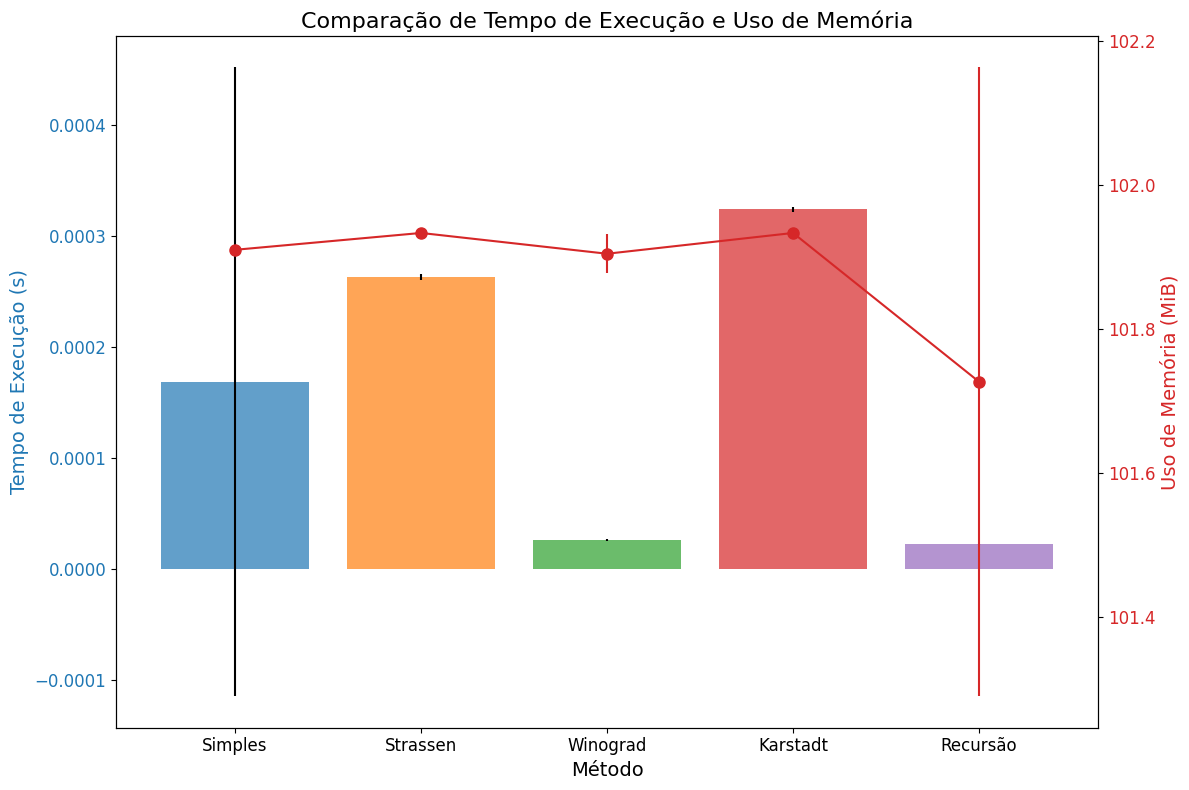

In [8]:
def create_matrix_widgets(rows, cols, matrix_name):
    """
    Cria uma matriz de widgets FloatText para entrada de valores.

    Args:
    rows (int): Número de linhas da matriz.
    cols (int): Número de colunas da matriz.
    matrix_name (str): Nome da matriz (usado para rotular os widgets).

    Returns:
    list: Matriz de widgets FloatText.
    """
    matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            row.append(widgets.FloatText(description=f'{matrix_name}[{i},{j}]', value=0))
        matrix.append(row)
    return matrix

def generate_random_matrix(rows, cols):
    """
    Gera uma matriz aleatória de inteiros de dimensões especificadas, com valores até 50.

    Args:
    rows (int): Número de linhas da matriz.
    cols (int): Número de colunas da matriz.

    Returns:
    np.ndarray: Matriz aleatória de inteiros.
    """
    return np.random.randint(0, 51, size=(rows, cols))

# Widgets para entrada do número de linhas e colunas
rows_A = widgets.IntText(description='Linhas A', value=2)
cols_A = widgets.IntText(description='Colunas A', value=3)
rows_B = widgets.IntText(description='Linhas B', value=3)
cols_B = widgets.IntText(description='Colunas B', value=2)

# Variáveis globais para armazenar os widgets das matrizes
matrix_A_widgets = []
matrix_B_widgets = []

# Função para gerar e exibir os widgets de entrada das matrizes
def generate_matrix_widgets(button):
    global matrix_A_widgets, matrix_B_widgets
    matrix_A_widgets = create_matrix_widgets(rows_A.value, cols_A.value, 'A')
    matrix_B_widgets = create_matrix_widgets(rows_B.value, cols_B.value, 'B')
    
    # Exibir widgets para a matriz A
    print("Matriz A:")
    for row in matrix_A_widgets:
        display(widgets.HBox(row))
    
    # Exibir widgets para a matriz B
    print("Matriz B:")
    for row in matrix_B_widgets:
        display(widgets.HBox(row))

# Função para gerar e exibir matrizes aleatórias
def generate_random_matrix_widgets(button):
    global matrix_A_widgets, matrix_B_widgets
    matrix_A = generate_random_matrix(rows_A.value, cols_A.value)
    matrix_B = generate_random_matrix(rows_B.value, cols_B.value)
    
    matrix_A_widgets = create_matrix_widgets(rows_A.value, cols_A.value, 'A')
    matrix_B_widgets = create_matrix_widgets(rows_B.value, cols_B.value, 'B')
    
    # Preencher widgets com valores aleatórios para a matriz A
    for i in range(rows_A.value):
        for j in range(cols_A.value):
            matrix_A_widgets[i][j].value = matrix_A[i, j]
    
    # Preencher widgets com valores aleatórios para a matriz B
    for i in range(rows_B.value):
        for j in range(cols_B.value):
            matrix_B_widgets[i][j].value = matrix_B[i, j]
    
    # Exibir widgets para a matriz A
    print("Matriz A (Aleatória):")
    for row in matrix_A_widgets:
        display(widgets.HBox(row))
    
    # Exibir widgets para a matriz B
    print("Matriz B (Aleatória):")
    for row in matrix_B_widgets:
        display(widgets.HBox(row))
       
# Botão para gerar os widgets de entrada das matrizes
generate_button = widgets.Button(description="Gerar Matrizes")
generate_button.on_click(generate_matrix_widgets)

# Botão para gerar matrizes aleatórias
generate_random_button = widgets.Button(description="Gerar Matrizes Aleatórias")
generate_random_button.on_click(generate_random_matrix_widgets)

# Botão para calcular o produto das matrizes
calculate_button = widgets.Button(description="Calcular")
calculate_button.on_click(calculate_matrix_product)

# Exibir widgets para entrada do número de linhas e colunas e os botões
display(rows_A, cols_A, rows_B, cols_B, generate_button, generate_random_button, calculate_button)